# Analysis of the influence of glioma size on prediction score

In [ ]:
%pip install synapseclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.2/468.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5


In [ ]:
%%shell
 synapse get -r syn68157018

Synapse username (Optional): Krzysztof_Tkaczyk
Auth token for user Krzysztof_Tkaczyk:
Welcome, Krzysztof_Tkaczyk!

[syn68157018:Brats2023_TrainingData]: Syncing Folder from Synapse.
[syn68198156]: Downloaded to /content/summary_tr.json
[syn68157019]: Downloaded to /content/OUTPUT_DIRECTORY.zip
[syn68157020]: Downloaded to /content/labelsTr.zip

In [ ]:
%%shell
ls -l

total 3564
-rw-r--r-- 1 root root 2947242 Jun  7 18:25 labelsTr.zip
-rw-r--r-- 1 root root  356346 Jun  7 18:25 OUTPUT_DIRECTORY.zip
drwxr-xr-x 1 root root    4096 Jun  5 13:38 sample_data
-rw-r--r-- 1 root root  334984 Jun  7 18:25 summary_tr.json
-rw-r--r-- 1 root root     397 Jun  7 18:25 SYNAPSE_METADATA_MANIFEST.tsv


In [ ]:
import json

# Ścieżka do pliku JSON
sciezka_do_pliku = 'summary_tr.json'

# Wczytanie i wyświetlenie zawartości
with open(sciezka_do_pliku, 'r', encoding='utf-8') as plik:
    dane = json.load(plik)
    print(json.dumps(dane, indent=4, ensure_ascii=False))

{
    "author": "Fabian",
    "description": "",
    "id": "de40ea1b9b48",
    "name": "",
    "results": {
        "all": [
            {
                "1": {
                    "Accuracy": 0.9974064740143369,
                    "Dice": 0.04817692276071854,
                    "False Discovery Rate": 0.9176156333473922,
                    "False Negative Rate": 0.9659579412106425,
                    "False Omission Rate": 0.0018639402113265193,
                    "False Positive Rate": 0.0007324830828615569,
                    "Jaccard": 0.024683037782738722,
                    "Negative Predictive Value": 0.9981360597886735,
                    "Precision": 0.0823843666526079,
                    "Recall": 0.0340420587893575,
                    "Total Positives Reference": 17214,
                    "Total Positives Test": 7113,
                    "True Negative Rate": 0.9992675169171384
                },
                "2": {
                    "Accuracy": 0.9934632616

In [ ]:
import os
import pandas as pd

data = dane
rows = []
for item in data['results']['all']:
    label_filename = os.path.basename(item['reference'])
    prediction_filename = os.path.basename(item['test'])
    for cls in ['1', '2', '3']:
        metrics = item[cls].copy()
        metrics['class'] = int(cls)
        metrics['label_filename'] = label_filename
        metrics['prediction_filename'] = prediction_filename
        rows.append(metrics)

df = pd.DataFrame(rows)
cols = ['label_filename', 'prediction_filename', 'class'] + [col for col in df.columns if col not in ['label_filename', 'prediction_filename', 'class']]
df = df[cols]

print(df)

         label_filename prediction_filename  class  Accuracy      Dice  \
0    BRATS_00003.nii.gz  BRATS_00003.nii.gz      1  0.997406  0.048177   
1    BRATS_00003.nii.gz  BRATS_00003.nii.gz      2  0.993463  0.000000   
2    BRATS_00003.nii.gz  BRATS_00003.nii.gz      3  0.996919  0.000000   
3    BRATS_00008.nii.gz  BRATS_00008.nii.gz      1  1.000000       NaN   
4    BRATS_00008.nii.gz  BRATS_00008.nii.gz      2  0.998541  0.000000   
..                  ...                 ...    ...       ...       ...   
445  BRATS_01529.nii.gz  BRATS_01529.nii.gz      2  0.997984  0.000000   
446  BRATS_01529.nii.gz  BRATS_01529.nii.gz      3  1.000000       NaN   
447  BRATS_01658.nii.gz  BRATS_01658.nii.gz      1  0.997400  0.000000   
448  BRATS_01658.nii.gz  BRATS_01658.nii.gz      2  0.988535  0.000000   
449  BRATS_01658.nii.gz  BRATS_01658.nii.gz      3  0.995428  0.000000   

     False Discovery Rate  False Negative Rate  False Omission Rate  \
0                0.917616             0.

## Total results

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


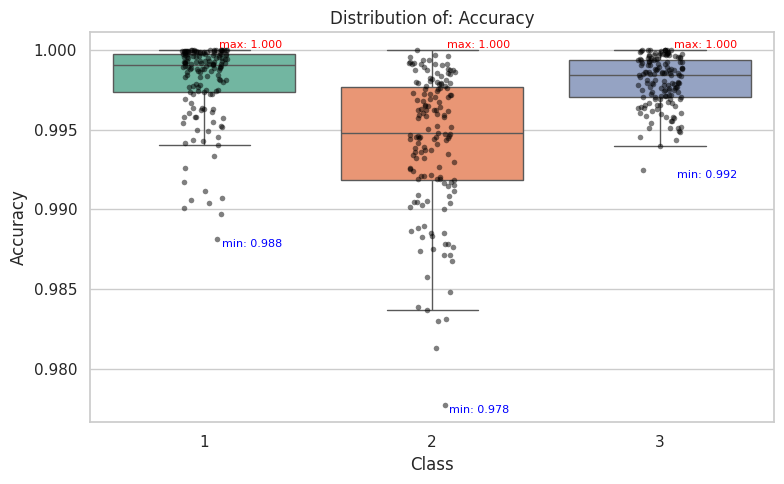

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


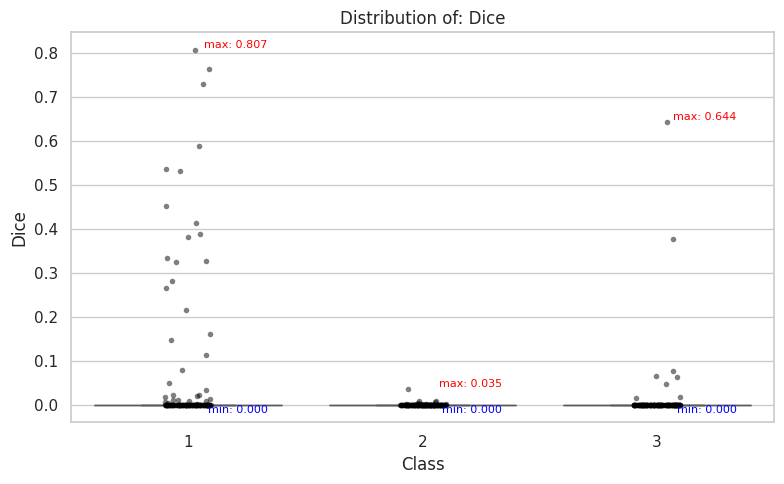

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


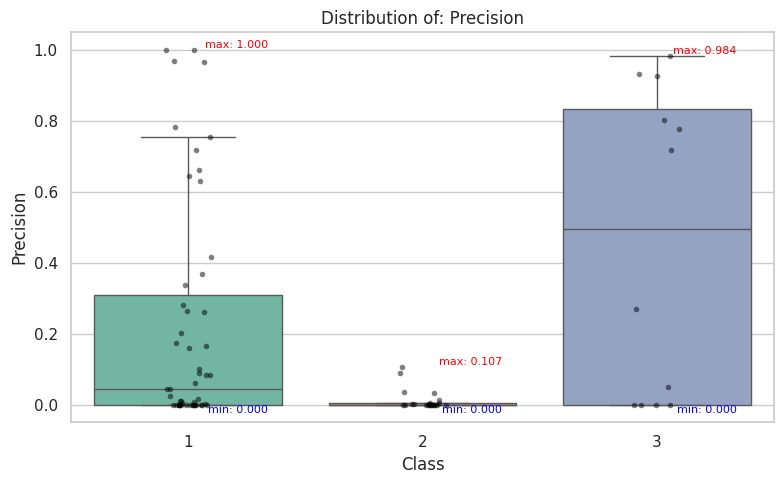

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


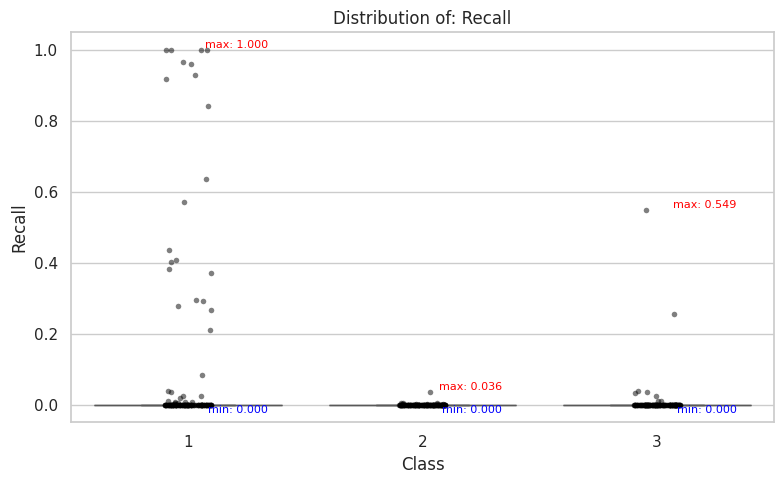

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


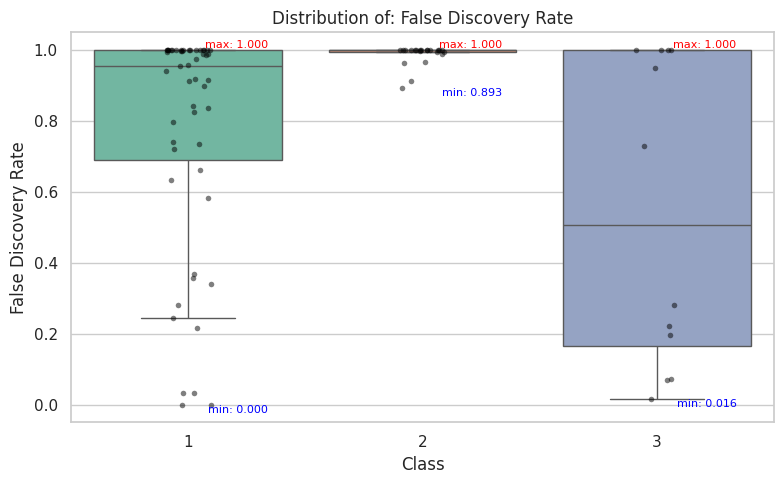

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


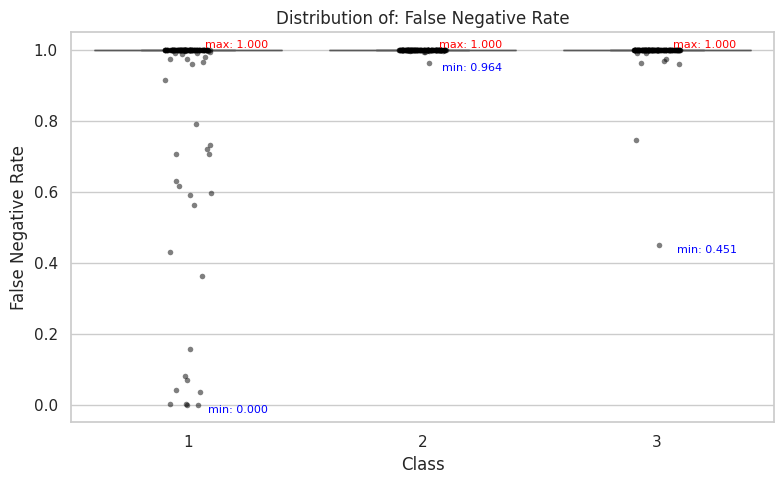

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


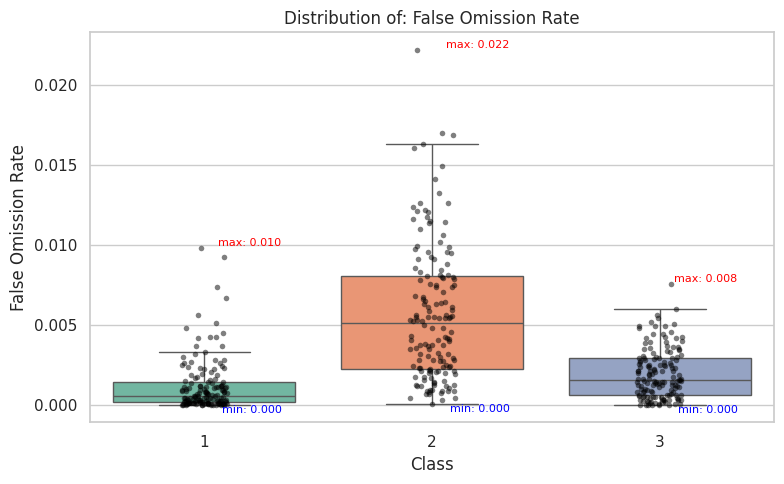

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


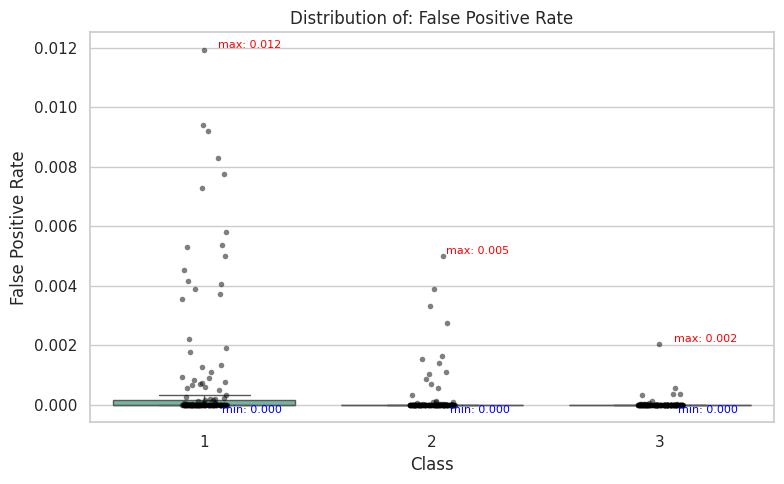

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


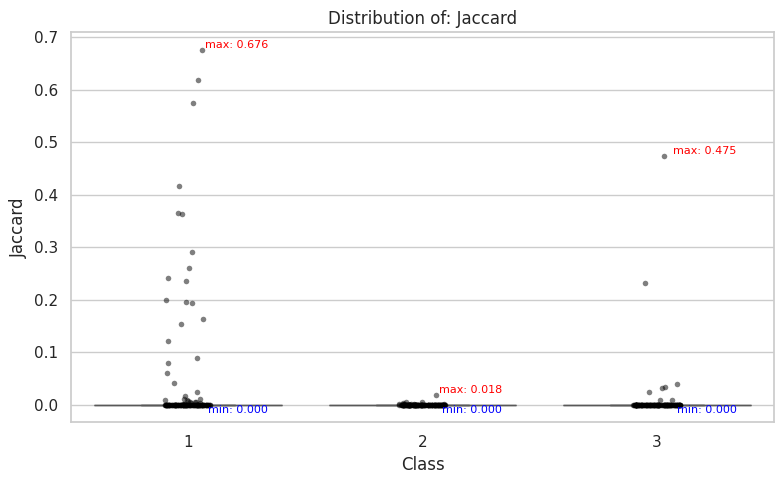

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


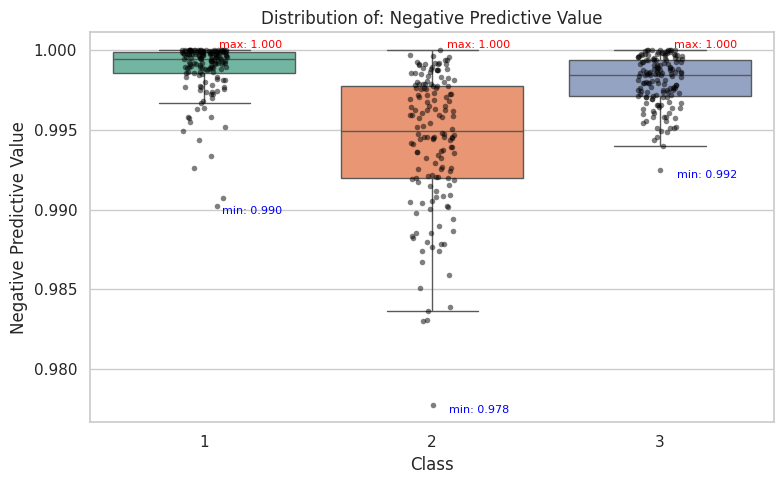

<ipython-input-5-21767e7c3938>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


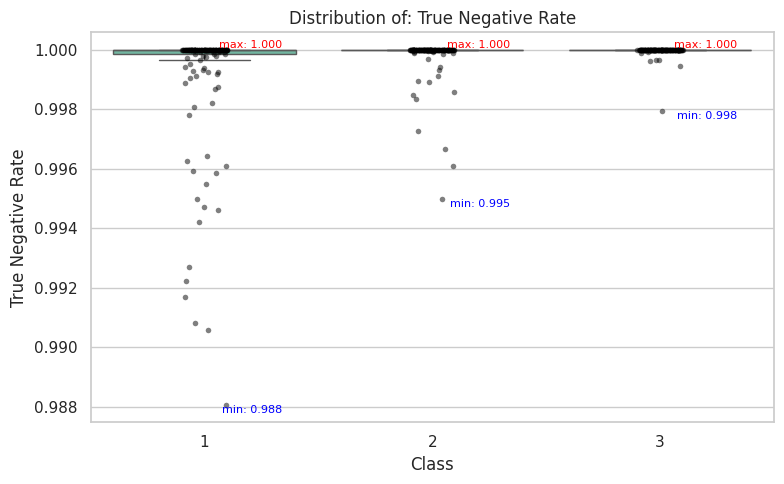

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Dice', 'Precision', 'Recall',
           'False Discovery Rate', 'False Negative Rate',
           'False Omission Rate', 'False Positive Rate',
           'Jaccard', 'Negative Predictive Value',
           'True Negative Rate']

sns.set(style="whitegrid")

for metric in metrics:
    if metric in df.columns:
        plt.figure(figsize=(8, 5))
        ax = sns.boxplot(
            data=df, x='class', y=metric, palette='Set2', showcaps=True, fliersize=0
        )
        sns.stripplot(
            data=df, x='class', y=metric, color='black', size=4, jitter=True, ax=ax, alpha=0.5
        )

        for cls in sorted(df['class'].unique()):
            vals = df[df['class'] == cls][metric].dropna()
            if not vals.empty:
                min_val = vals.min()
                max_val = vals.max()
                ax.text(cls - 0.66, min_val, f"min: {min_val:.3f}", color='blue', ha='right', va='top', fontsize=8)
                ax.text(cls - 0.66, max_val, f"max: {max_val:.3f}", color='red', ha='right', va='bottom', fontsize=8)

        plt.title(f'Distribution of: {metric}')
        plt.xlabel('Class')
        plt.ylabel(metric)
        plt.tight_layout()
        plt.show()


Same thing but on one plot

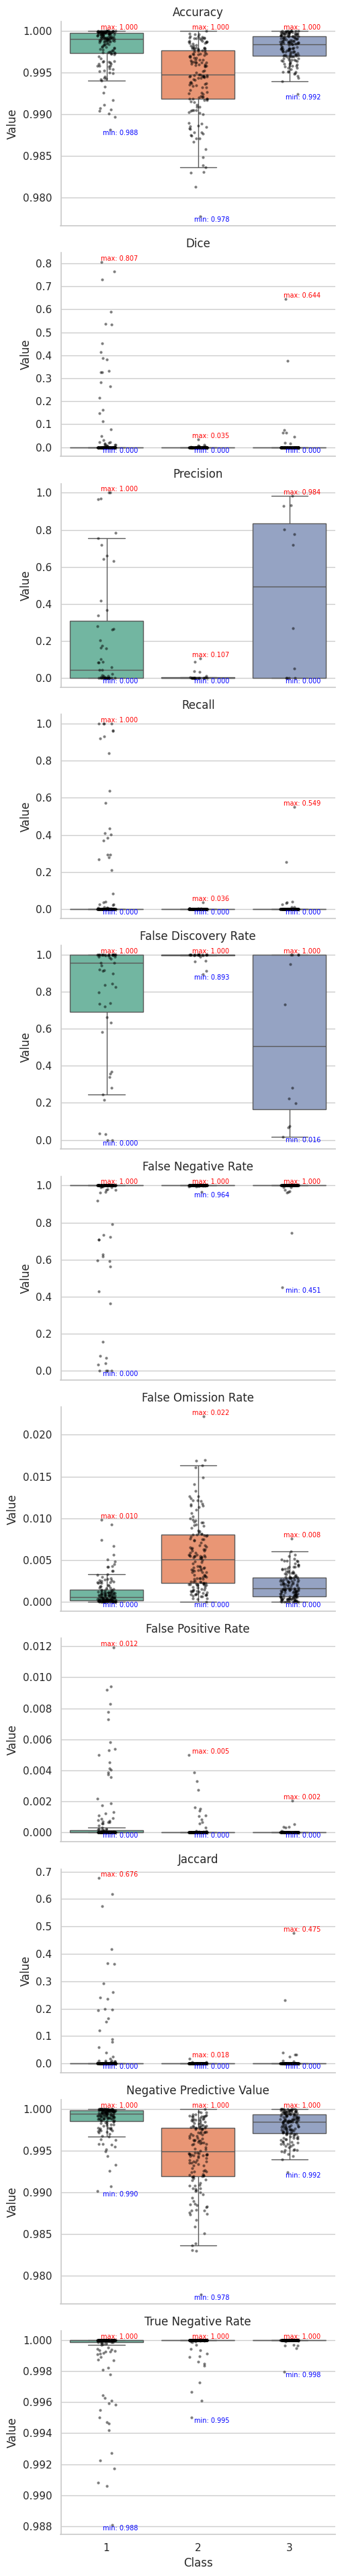

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

metrics = ['Accuracy', 'Dice', 'Precision', 'Recall',
           'False Discovery Rate', 'False Negative Rate',
           'False Omission Rate', 'False Positive Rate',
           'Jaccard', 'Negative Predictive Value',
           'True Negative Rate']

df_long = df.melt(id_vars=['class'], value_vars=metrics, var_name='metric', value_name='value')

g = sns.FacetGrid(df_long, col="metric", col_wrap=1, height=3.5, aspect=1.5, sharey=False)

def plot_box_with_annotations(data, color, **kwargs):
    ax = plt.gca()
    sns.boxplot(data=data, x='class', y='value', palette='Set2', showcaps=True, fliersize=0, ax=ax)
    sns.stripplot(data=data, x='class', y='value', color='black', size=3, jitter=True, alpha=0.5, ax=ax)

    for cls in sorted(data['class'].unique()):
        vals = data[data['class'] == cls]['value'].dropna()
        if not vals.empty:
            min_val = vals.min()
            max_val = vals.max()
            ax.text(cls - 0.66, min_val, f"min: {min_val:.3f}", color='blue', ha='right', va='top', fontsize=7)
            ax.text(cls - 0.66, max_val, f"max: {max_val:.3f}", color='red', ha='right', va='bottom', fontsize=7)

g.map_dataframe(plot_box_with_annotations)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Class", "Value")
plt.tight_layout()
plt.show()


## Calculation of sizes of clasess

In [ ]:
%%shell
ls -l

total 3564
-rw-r--r-- 1 root root 2947242 Jun  7 18:25 labelsTr.zip
-rw-r--r-- 1 root root  356346 Jun  7 18:25 OUTPUT_DIRECTORY.zip
drwxr-xr-x 1 root root    4096 Jun  5 13:38 sample_data
-rw-r--r-- 1 root root  334984 Jun  7 18:25 summary_tr.json
-rw-r--r-- 1 root root     397 Jun  7 18:25 SYNAPSE_METADATA_MANIFEST.tsv


In [ ]:
%%shell
unzip /content/OUTPUT_DIRECTORY.zip -d /OUTPUT_DIRECTORY

Archive:  /content/OUTPUT_DIRECTORY.zip
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-00838-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-00494-001.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-01137-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-00768-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/plans.pkl  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-00645-001.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-00109-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-01183-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-00407-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-00311-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-01301-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-01132-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-00840-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-00457-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-01658-000.nii.gz  
  inflating: /OUTPUT_DIRECTORY/BraTS-GLI-01370-000.nii.gz  
  inflating: /OUT

In [ ]:
%%shell
unzip /content/labelsTr.zip -d /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData

Archive:  /content/labelsTr.zip
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_01239.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_01505.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_01349.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_00203.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_01001.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_01658.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_00061.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_00773.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_00765.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_01133.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BRATS_00737.nii.gz  
  inflating: /ASNR-MICCAI-BraTS2023-SSA-Chal

In [ ]:
import os
import shutil
import json

input_dir = "/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/"
task_name = "Task02_BrainSSA"
base_output = "/content/nnUNet_raw_data_base/nnUNet_raw_data"
task_dir = os.path.join(base_output, task_name)
labelsTr_dir = os.path.join(task_dir, "labelsTr")

os.makedirs(labelsTr_dir, exist_ok=True)

# Zakładam, że nazwa subdir to nazwa pliku bez rozszerzenia i sufiksów modalności
def get_subdir_name(filename):
    # Usuwamy rozszerzenie .nii.gz i potencjalne modalności / "-seg"
    name = filename.replace(".nii.gz", "")
    for suffix in ["-t1c", "-t1n", "-t2f", "-t2w", "-seg"]:
        if name.endswith(suffix):
            name = name[:-len(suffix)]
    return name

copied_files = []

for file in os.listdir(input_dir):
    if file.endswith(".nii.gz"):
        filepath = os.path.join(input_dir, file)
        subdir = get_subdir_name(file)

        # Tworzymy nazwę docelową, np. BRATS_00008_t1c.nii.gz albo BRATS_00008_seg.nii.gz
        dest_filename = file  # zostawiamy oryginalną nazwę, żeby nie mieszać modalności

        dest_path = os.path.join(labelsTr_dir, dest_filename)
        shutil.copy(filepath, dest_path)
        copied_files.append(dest_filename)

print(f"✅ Skopiowano {len(copied_files)} plików do labelsTr.")

# Tworzenie dataset.json
# Tworzymy listę unikalnych subdirów (bazowych nazw bez modalności i rozszerzeń)
subdirs = sorted(set(get_subdir_name(f) for f in copied_files))

dataset_json = {
    "name": "BraTS2023_SSA_Training",
    "description": "All files copied to labelsTr folder",
    "tensorImageSize": "4D",
    "modality": {
        "0": "T1c",
        "1": "T1n",
        "2": "T2f",
        "3": "T2w"
    },
    "labels": {
        "0": "background",
        "1": "tumor"
    },
    "numTraining": len(subdirs),
    "training": [
        {
            "image": f"./labelsTr/{subdir}-t1c.nii.gz",
            "label": f"./labelsTr/{subdir}-seg.nii.gz"
        } for subdir in subdirs
    ],
    "numTest": 0,
    "test": []
}

with open(os.path.join(task_dir, "dataset.json"), "w") as f:
    json.dump(dataset_json, f, indent=4)

print("✅ dataset.json został utworzony.")


✅ Skopiowano 150 plików do labelsTr.
✅ dataset.json został utworzony.


In [ ]:
%pip install nibabel

In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

base_path = "/content/nnUNet_raw_data_base/nnUNet_raw_data/Task02_BrainSSA/labelsTr/"
reference_files = df['label_filename'].unique()
reference_paths = [os.path.join(base_path, f) for f in reference_files]

volume_data = []

for path in tqdm(reference_paths, desc="Processing NIfTI files"):
    img = nib.load(path)
    data = img.get_fdata()

    classes, counts = np.unique(data, return_counts=True)
    class_volume = dict(zip(classes.astype(int), counts))

    filename = os.path.basename(path)

    record = {
        'label_filename': filename,
        'volume_class_1': class_volume.get(1, 0),
        'volume_class_2': class_volume.get(2, 0),
        'volume_class_3': class_volume.get(3, 0),
        'volume_total_voxels': int(np.prod(data.shape)),
    }
    volume_data.append(record)

volume_df = pd.DataFrame(volume_data)

df = df.merge(volume_df, on='label_filename', how='left')


Processing NIfTI files: 100%|██████████| 150/150 [00:58<00:00,  2.55it/s]


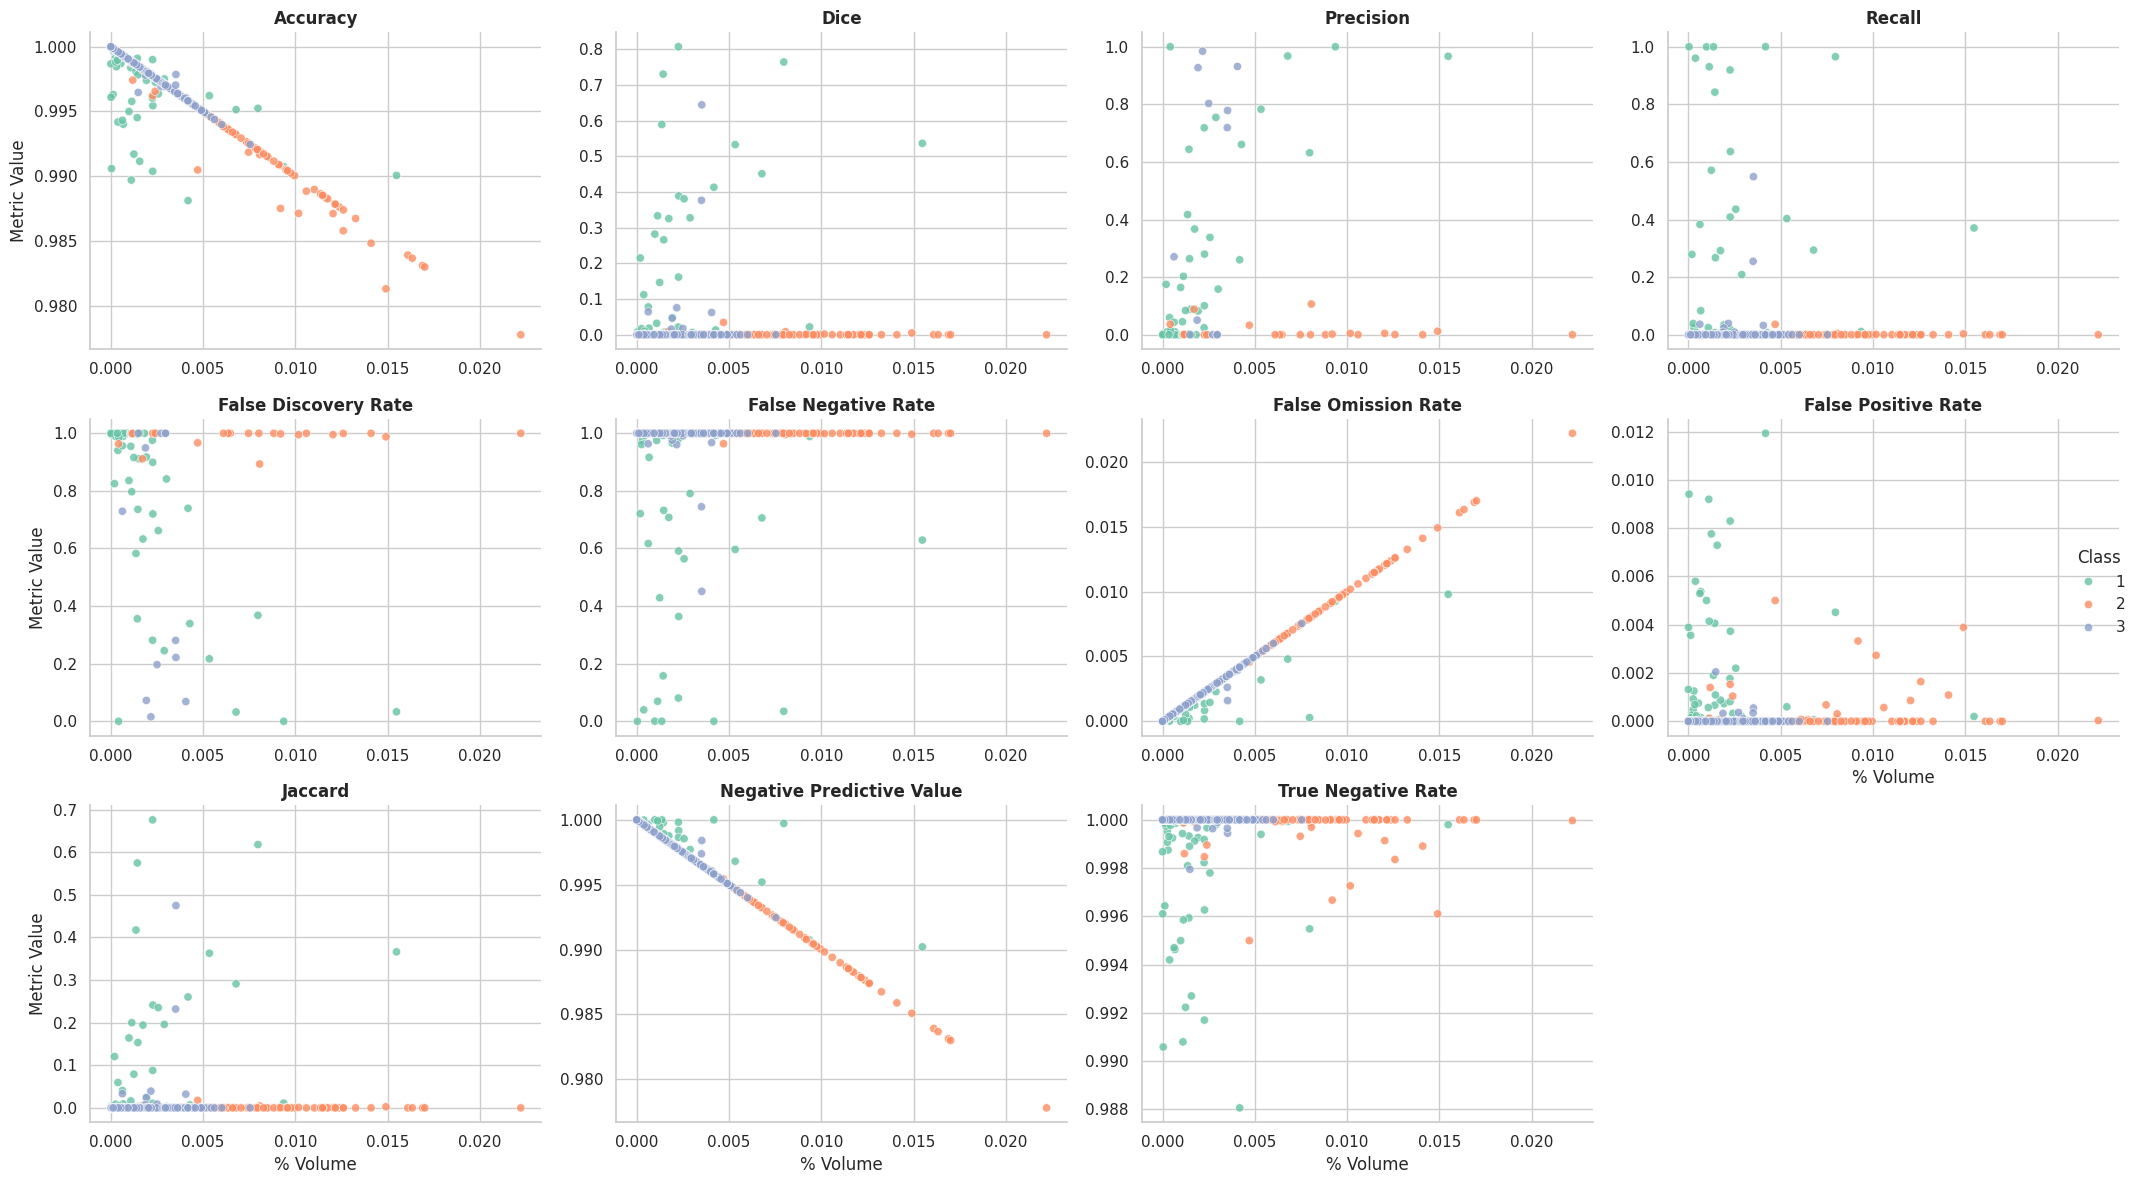

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Dice', 'Precision', 'Recall',
           'False Discovery Rate', 'False Negative Rate',
           'False Omission Rate', 'False Positive Rate',
           'Jaccard', 'Negative Predictive Value',
           'True Negative Rate']

for cls in [1, 2, 3]:
    df[f'volume_frac_{cls}'] = df[f'volume_class_{cls}'] / df['volume_total_voxels']

plot_data = []
for metric in metrics:
    for cls in [1, 2, 3]:
        temp = df[df['class'] == cls].copy()
        temp['metric'] = metric
        temp['value'] = temp[metric]
        temp['volume_frac'] = temp[f'volume_frac_{cls}']
        temp['class'] = str(cls)
        plot_data.append(temp[['metric', 'value', 'volume_frac', 'class']])

plot_df = pd.concat(plot_data)

g = sns.FacetGrid(plot_df, col="metric", col_wrap=4, height=4, aspect=1.3, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="volume_frac", y="value", hue="class", palette="Set2", alpha=0.8)

g.set_axis_labels("% Volume", "Metric Value")
g.add_legend(title="Class")

for ax, title in zip(g.axes.flat, plot_df['metric'].unique()):
    ax.set_title(title, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
import os
import nibabel as nib
import numpy as np

def list_unique_values_in_folder(folder_path):
    print(f"Folder: {folder_path}")
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.nii.gz'):
            file_path = os.path.join(folder_path, filename)
            img = nib.load(file_path)
            data = img.get_fdata()
            unique_values = np.unique(data)
            unique_values = unique_values[unique_values != 0]  # jeśli chcesz pominąć tło (0)
            print(f"{filename}: unique classes = {unique_values}")

# Podaj ścieżki do folderów
folder1 = '/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData'
folder2 = '/OUTPUT_DIRECTORY'

list_unique_values_in_folder(folder1)
print("\n---\n")
list_unique_values_in_folder(folder2)


Folder: /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData
BRATS_00003.nii.gz: unique classes = [1. 2. 3.]
BRATS_00008.nii.gz: unique classes = [2. 3.]
BRATS_00021.nii.gz: unique classes = [1. 2. 3.]
BRATS_00022.nii.gz: unique classes = [1. 2. 3.]
BRATS_00036.nii.gz: unique classes = [1. 2. 3.]
BRATS_00044.nii.gz: unique classes = [1. 2. 3.]
BRATS_00046.nii.gz: unique classes = [1. 2. 3.]
BRATS_00048.nii.gz: unique classes = [2.]
BRATS_00053.nii.gz: unique classes = [1. 2. 3.]
BRATS_00056.nii.gz: unique classes = [1. 2. 3.]
BRATS_00061.nii.gz: unique classes = [1. 2. 3.]
BRATS_00066.nii.gz: unique classes = [1. 2. 3.]
BRATS_00081.nii.gz: unique classes = [1. 2. 3.]
BRATS_00087.nii.gz: unique classes = [1. 2. 3.]
BRATS_00094.nii.gz: unique classes = [1. 2. 3.]
BRATS_00103.nii.gz: unique classes = [1. 2. 3.]
BRATS_00109.nii.gz: unique classes = [1. 2. 3.]
BRATS_00113.nii.gz: unique classes = [1. 2. 3.]
BRATS_00117.nii.gz: unique classes = [1. 2. 3.]
BRATS_00147.nii.gz: unique classes = [1

Processing files in /ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData: 100%|██████████| 150/150 [00:55<00:00,  2.72it/s]


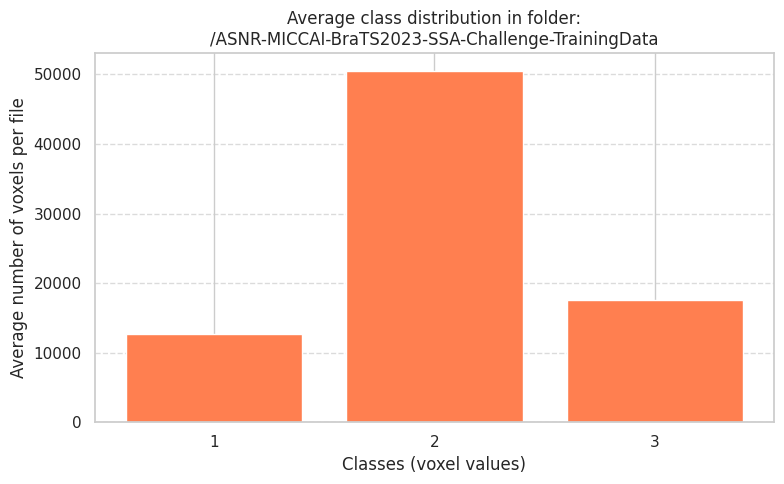

Processing files in /OUTPUT_DIRECTORY: 100%|██████████| 150/150 [00:30<00:00,  4.98it/s]


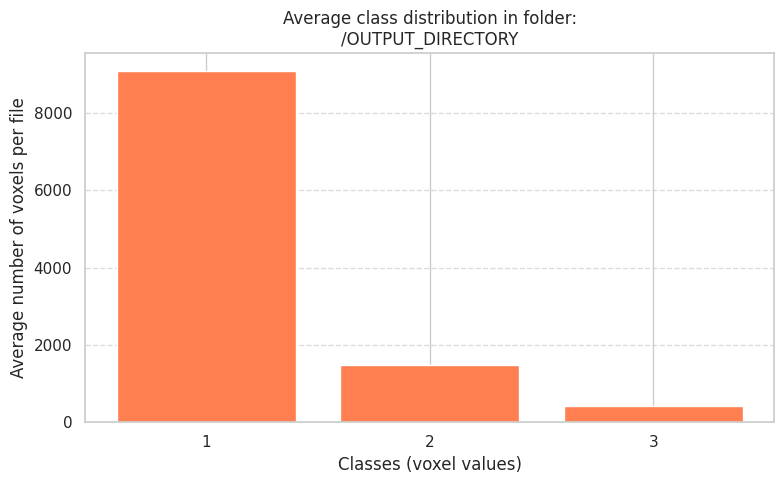

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

def plot_average_class_distribution(folder_path):
    class_counts_sum = defaultdict(int)
    file_list = [f for f in sorted(os.listdir(folder_path)) if f.endswith('.nii.gz')]
    file_count = len(file_list)

    if file_count == 0:
        print(f"No NIfTI files found in {folder_path}")
        return

    for filename in tqdm(file_list, desc=f"Processing files in {folder_path}"):
        file_path = os.path.join(folder_path, filename)
        img = nib.load(file_path)
        data = img.get_fdata()
        values, counts = np.unique(data, return_counts=True)

        mask = values != 0
        values = values[mask]
        counts = counts[mask]

        for v, c in zip(values, counts):
            class_counts_sum[v] += c

    avg_counts = {cls: count / file_count for cls, count in class_counts_sum.items()}

    classes = sorted(avg_counts.keys())
    avg_values = [avg_counts[cls] for cls in classes]

    plt.figure(figsize=(8, 5))
    plt.bar(classes, avg_values, color='coral')
    plt.xlabel('Classes (voxel values)')
    plt.ylabel('Average number of voxels per file')
    plt.title(f'Average class distribution in folder:\n{folder_path}')
    plt.xticks(classes)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

folder1 = '/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData'
folder2 = '/OUTPUT_DIRECTORY'

plot_average_class_distribution(folder1)
plot_average_class_distribution(folder2)


In [ ]:
 !synapse get -r syn59059776

Synapse username (Optional): Krzysztof_Tkaczyk
Auth token for user Krzysztof_Tkaczyk:
Welcome, Krzysztof_Tkaczyk!

[syn59059776:BraTS-GLI]: Syncing Folder from Synapse.
[syn59808905]: Downloaded to /content/CITATIONS.bib
[syn64735496]: Downloaded to /content/BraTS-PTG supplementary demographic information and metadata.xlsx
[syn60086071]: Downloaded to /content/BraTS2024-BraTS-GLI-TrainingData.zip
[syn61455507]: Downloaded to /content/BraTS2024-BraTS-GLI-ValidationData.zip
[syn64314352]: Downloaded to /content/BraTS2024-BraTS-GLI-AdditionalTrainingData.zip

In [ ]:
import pandas as pd
data = pd.read_excel("/content/BraTS-PTG supplementary demographic information and metadata.xlsx")

In [ ]:
data.columns

Index(['BraTS Subject ID', 'Site', 'Site Subject ID', 'Annotator 1',
       'Approver 1', 'Train/Test/Validation ', 'Magnetic Field Strength',
       'Manufacturer', 'Patient's Age', 'Patient's Sex', 'Glioma type '],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BraTS Subject ID         1809 non-null   object 
 1   Site                     1809 non-null   object 
 2   Site Subject ID          781 non-null    object 
 3   Annotator 1              1110 non-null   object 
 4   Approver 1               1809 non-null   object 
 5   Train/Test/Validation    1809 non-null   object 
 6   Magnetic Field Strength  1809 non-null   float64
 7   Manufacturer             1796 non-null   object 
 8   Patient's Age            1790 non-null   float64
 9   Patient's Sex            1809 non-null   object 
 10  Glioma type              1809 non-null   object 
dtypes: float64(2), object(9)
memory usage: 155.6+ KB


['Oligodendroglioma' 'Glioblastoma' 'Glioma NOS' 'Astrocytoma' 'Other'
 'glioma NOS']
['Oligodendroglioma' 'Glioblastoma' 'Glioma Nos' 'Astrocytoma' 'Other']


<ipython-input-18-6e5c1a6a3293>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Glioma Type', loc='upper right')


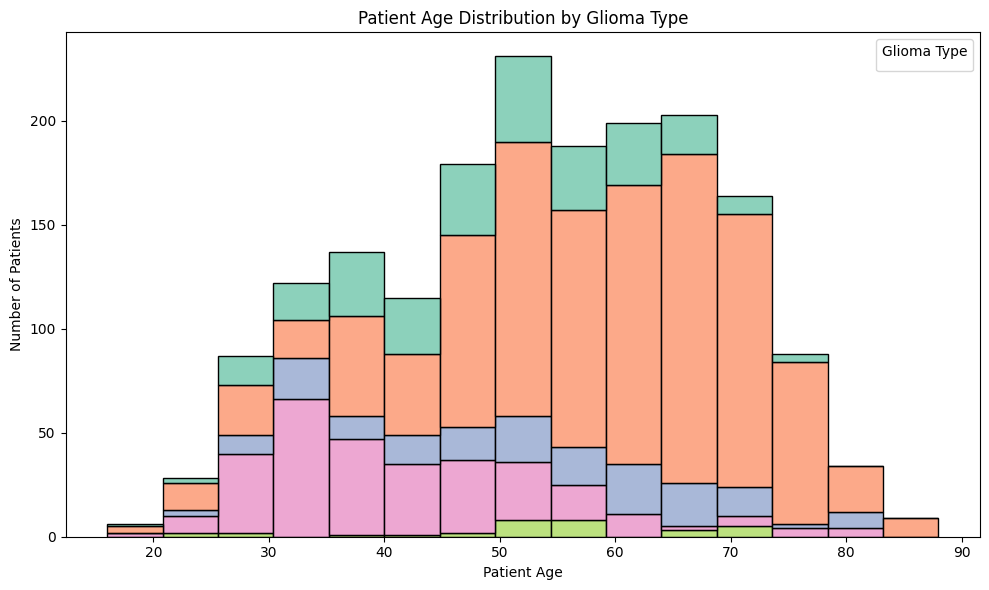

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called 'data'
# Optional: check unique glioma types
print(data['Glioma type '].unique())
data['Glioma type'] = data['Glioma type '].str.strip().str.lower().str.title()
print(data['Glioma type'].unique())

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Patient's Age", hue='Glioma type', bins=15, multiple='stack', palette='Set2')

plt.title('Patient Age Distribution by Glioma Type')
plt.xlabel('Patient Age')
plt.ylabel('Number of Patients')
plt.legend(title='Glioma Type', loc='upper right')
plt.tight_layout()
plt.show()
